iris (붓꽃) classification

150 data instances
X: 4개 features (sepal length, sepal width, petal length, petal width
Y: 3개 iris 종류 (Iris-Setosa, Iris-Versicolour, Iris-Virginica)

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
activation_2 (Activation)    (None, 32)               

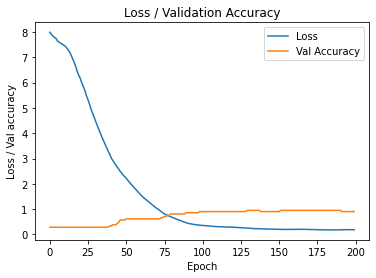

45/45 [==============================] - 0s 185us/step
loss:  0.22781191882159973
accuracy:  0.9111111164093018


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split # dataset split 기능
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score

data = load_iris()
X_data = data.data
y_data = data.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#######################################################
# Generating Model
#######################################################
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32, input_shape = (4,), kernel_initializer='he_normal')) # number of features
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(3, kernel_initializer='he_normal'))
# Output layer => output dimension = 1 since it is binary classification
model.add(Activation("softmax"))

model.summary()

from keras import optimizers
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics = ["acc"])

#######################################################
# Training Model
#######################################################
history = model.fit(X_train, y_train, batch_size = 50, epochs = 200, validation_split = 0.2)

#######################################################
# Plotting
#######################################################
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])
plt.title('Loss / Validation Accuracy')
plt.ylabel('Loss / Val accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val Accuracy'], loc='upper right')
plt.show()

#######################################################
# Model Evaluation
#######################################################
results = model.evaluate(X_test, y_test)
print('loss: ', results[0])
print('accuracy: ', results[1])